In [2]:
# import necessities
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
#import pandas.util.testing as tm
data = pd.read_csv("D:\Projects\Diamond Price Prediction\diamonds.csv")
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
# checking the datatypes and null values in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
data = data.drop(['depth','table','x','y','z'],axis=1)

In [6]:
data.head()

,carat,cut,color,clarity,price
0,0.23,Ideal,E,SI2,326
1,0.21,Premium,E,SI1,326
2,0.23,Good,E,VS1,327
3,0.29,Premium,I,VS2,334
4,0.31,Good,J,SI2,335


In [7]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
price        int64
dtype: object

In [8]:
data['price'] = data.price.astype(float)
data.dtypes

carat      float64
cut         object
color       object
clarity     object
price      float64
dtype: object

In [9]:
#Data Visualization

Text(0.5, 1.0, 'Diamond Price Distribution')

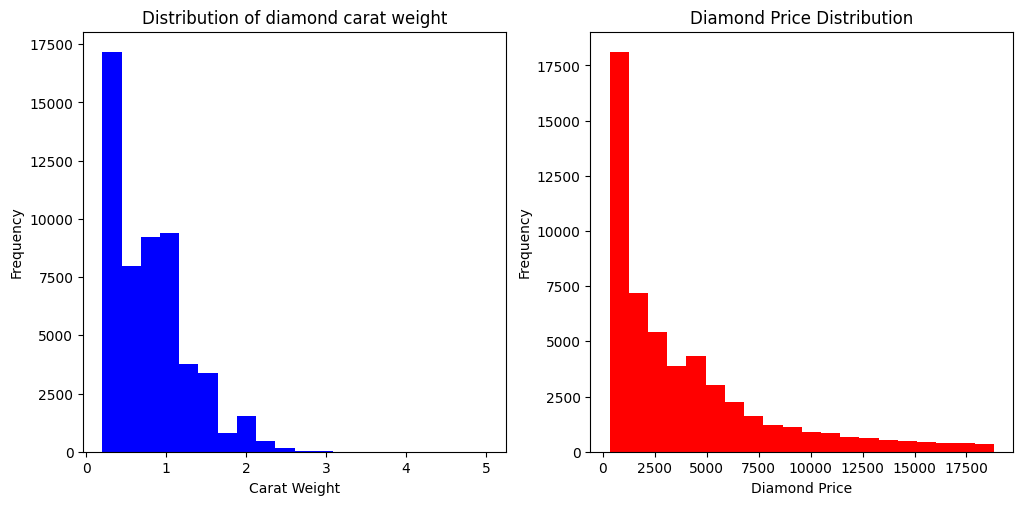

In [10]:
plt.figure(figsize = [12,12])
plt.subplot(221)
#carat weight distribution
plt.hist(data['carat'],bins = 20,color = 'b')
plt.xlabel("Carat Weight")
plt.ylabel("Frequency")
plt.title("Distribution of diamond carat weight")
plt.subplot(222)

#Distribution of price value
plt.hist(data['price'],bins = 20,color = 'r')
plt.xlabel("Diamond Price")
plt.ylabel("Frequency")
plt.title("Diamond Price Distribution")

In [11]:
#Label Encoder converting categorical data into numeric form
from sklearn.preprocessing import LabelEncoder
l1 = LabelEncoder()
label = l1.fit_transform(data['cut'])
l1.classes_

array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)

In [12]:
label

array([2, 3, 1, ..., 4, 3, 2])

In [13]:
data['cut_label'] = label

In [14]:
data.head()

,carat,cut,color,clarity,price,cut_label
0,0.23,Ideal,E,SI2,326.0,2
1,0.21,Premium,E,SI1,326.0,3
2,0.23,Good,E,VS1,327.0,1
3,0.29,Premium,I,VS2,334.0,3
4,0.31,Good,J,SI2,335.0,1


In [15]:
l2 = LabelEncoder()
label1 = l2.fit_transform(data['clarity'])
data['clarity_label'] = label1
data.head()

,carat,cut,color,clarity,price,cut_label,clarity_label
0,0.23,Ideal,E,SI2,326.0,2,3
1,0.21,Premium,E,SI1,326.0,3,2
2,0.23,Good,E,VS1,327.0,1,4
3,0.29,Premium,I,VS2,334.0,3,5
4,0.31,Good,J,SI2,335.0,1,3


In [16]:
data['color'] = data['color'].map({'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7,'NA':8})

In [17]:
data['color'].fillna(0)

0        2
1        2
2        2
3        6
4        7
        ..
53935    1
53936    1
53937    1
53938    5
53939    1
Name: color, Length: 53940, dtype: int64

In [18]:
data['color'].isnull().sum()

0

In [18]:
#data['color'] = data['color'].fillna(method = 'ffill')

In [19]:
#data['color'].isnull().sum()

In [19]:
y = data['price']
y.head()

0    326.0
1    326.0
2    327.0
3    334.0
4    335.0
Name: price, dtype: float64

In [20]:
x = data.drop(['price','cut','clarity'],axis = 1)
x.head()

,carat,color,cut_label,clarity_label
0,0.23,2,2,3
1,0.21,2,3,2
2,0.23,2,1,4
3,0.29,6,3,5
4,0.31,7,1,3


In [21]:
#Trining Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8, random_state = 42)

In [22]:
len(x_train)

43152

In [23]:
len(y_test)

10788

In [24]:
len(data)

53940

In [25]:
data.head()

,carat,cut,color,clarity,price,cut_label,clarity_label
0,0.23,Ideal,2,SI2,326.0,2,3
1,0.21,Premium,2,SI1,326.0,3,2
2,0.23,Good,2,VS1,327.0,1,4
3,0.29,Premium,6,VS2,334.0,3,5
4,0.31,Good,7,SI2,335.0,1,3


In [26]:
data.tail()

,carat,cut,color,clarity,price,cut_label,clarity_label
53935,0.72,Ideal,1,SI1,2757.0,2,2
53936,0.72,Good,1,SI1,2757.0,1,2
53937,0.70,Very Good,1,SI1,2757.0,4,2
53938,0.86,Premium,5,SI2,2757.0,3,3
53939,0.75,Ideal,1,SI2,2757.0,2,3


In [27]:
#StandardScaler Method
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [28]:
#Linear Regressionr Method
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)
pred = linreg.predict(x_test)

In [29]:
#Accuracy score of LinearRegression model
from sklearn.metrics import r2_score
lr = r2_score(y_test,pred)*100
print(lr)

87.76517206528275


In [30]:
#Decision Tree Regressor Algorith
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(x_train,y_train)
pred1 = reg.predict(x_test)

In [31]:
#Accuracy score of Decision Tree Regressor model
from sklearn.metrics import r2_score
dtr = r2_score(y_test,pred1)*100
print(dtr)

97.15232845310294


In [32]:
#Random Forest Regressor Algorithm
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 50)
rf.fit(x_train,y_train)
pred2 = rf.predict(x_test)

In [33]:
#Accuracy score of RandomForestRegressor model
from sklearn.metrics import r2_score
rfr = r2_score(y_test,pred2)*100
print(rfr)

97.75846367387506


In [34]:
#K-Neighbors Regressor Algorithm
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(x_train,y_train)
pred3 = knn.predict(x_test)

In [35]:
#Accuracy score of K-Neighbor sRegressor model
from sklearn.metrics import r2_score
knr = r2_score(y_test,pred3)*100
print(knr)

97.55732859021302


In [36]:
#Lasso Regressio Algorithm
from sklearn.linear_model import Lasso
lassoreg = Lasso()
lassoreg.fit(x_train,y_train)
pred4 = lassoreg.predict(x_test)

In [37]:
#Accuracy score of Lassp model
from sklearn.metrics import r2_score
lasso = r2_score(y_test,pred4)*100
print(lasso)

87.76523078289839


In [38]:
#Ridge Regression Algorithm
from sklearn.linear_model import Ridge
ridreg = Ridge()
ridreg.fit(x_train,y_train)
pred5 = ridreg.predict(x_test)

In [39]:
#Accuracy score of Ridgemodel
from sklearn.metrics import r2_score
rid = r2_score(y_test,pred5)*100
print(rid)

87.76517737916106


In [41]:
#SVR Algorithm
#from sklearn.svm import SVR
#svr = SVR()
#svr.fit(x_train,y_train)
#pred6 = svr.predict(x_test)

In [42]:
#Accuracy score of SVR Algorithm
#from sklearn.metrics import r2_score
#svrscore = r2_score(y_test,pred)*100
#print(svrscore)

In [40]:
print("LinearRegression",lr)
print("Decision Tree",dtr)
print("RandomForestClassifier",rfr)
print("KNN Regressor",knr)
print("Ridge Linear model",rid)
print("Lasso Linear model",lasso)
#print("Support Vector Regressor",svrscore)

LinearRegression 87.76517206528275
Decision Tree 97.15232845310294
RandomForestClassifier 97.75846367387506
KNN Regressor 97.55732859021302
Ridge Linear model 87.76517737916106
Lasso Linear model 87.76523078289839


In [1]:
#Prediction Part

def prediction():
    carat = (input("Enter the value of carat: "))
    cut = (input("Enter the value of cut: "))
    clarity = (input("Enter the value of clarity: "))
    color = (input("Enter the value of color: "))
    
    price = rf.predict([[carat,cut,clarity,color]])
    print("Approximately Price of Diamond is: ",price,"RS")

predi = prediction()

In [45]:
import pickle

pickle.dump(rf,open('model1.pkl','wb'))